In [ ]:
!apt-get install fonts-noto -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-noto is already the newest version (20201225-1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
import string
from collections import defaultdict
import math

In [ ]:
class Node:
    def __init__(self):
        self.links = {}
        self.cw = 0
        self.cp = 0
        self.stopwords=[]

    def contains(self, c):
        return c in self.links

    def add(self, c, node):
        self.links[c] = node

class Trie:
    def __init__(self):
        self.root = Node()

    def insert(self, word):
        node = self.root
        for c in word:
            if not node.contains(c):
                node.add(c, Node())
            node = node.links[c]
            node.cp += 1
        node.cw += 1

    def suffixinsert(self, word):
        node = self.root
        word=reversed(word)
        for c in word:
            if not node.contains(c):
                node.add(c, Node())
            node = node.links[c]
            node.cp += 1
        node.cw += 1

    def countWordsEqualTo(self, word):
        node = self.root
        for c in word:
            if not node.contains(c):
                return 0
            node = node.links[c]
        return node.cw

    def countWordsStartingWith(self, word):
        node = self.root
        for c in word:
            if not node.contains(c):
                return 0
            node = node.links[c]
        return node.cp

    def erase(self, word):
        node = self.root
        if self.countWordsEqualTo(word) <= 0:
            return

        for c in word:
            node = node.links[c]
            node.cp -= 1

        node.cw -= 1
    def split(self, word, suffix_freq, min_stem=2, min_freq=5):
        node = self.root
        split_index = -1
        max_branching = 0

        for i, c in enumerate(word):
            if not node.contains(c):
                return word + "+"
            node = node.links[c]

            branching = len(node.links)
            if branching > max_branching:
                suffix = word[i+1:]
                if len(word[:i+1]) >= min_stem and suffix_freq[suffix] >= min_freq:
                    max_branching = branching
                    split_index = i

        if split_index != -1:
            return word[:split_index+1] + " + " + word[split_index+1:]
        return word + "+"

    def susplit(self, word, suffix_freq, min_stem=4, min_freq=100):
        rev_word = word[::-1]
        node = self.root
        best_score = -1
        best_index = -1

        for i, c in enumerate(rev_word):
            if not node.contains(c):
                return word + "+"
            node = node.links[c]

            suffix = rev_word[:i+1][::-1]
            stem = rev_word[i+1:][::-1]
            freq = suffix_freq.get(suffix, 1)

            if len(stem) >= min_stem and freq > 1:
                branching = len(node.links)
                score = (branching * math.log(freq)) / (1 + len(suffix))

                if score > best_score:
                    best_score = score
                    best_index = i

        if best_index != -1:
            suffix = rev_word[:best_index+1][::-1]
            stem = rev_word[best_index+1:][::-1]
            return stem + " + " + suffix
        return word + "+"
def collect_suffix_frequencies(words, max_suffix_len=3):
      freq = defaultdict(int)
      for w in words:
          for l in range(1, min(max_suffix_len, len(w)) + 1):
              freq[w[-l:]] += 1
      return freq

In [ ]:
trie = Trie()
words = set()
input_file = "brown_nouns.txt"
with open(input_file, "r", encoding="utf-8") as fh:
        for line in fh:
            token = line.strip().lower()
            if not token:
                continue
            words.add(token)
            trie.insert(token)

In [ ]:
suffix_freq = collect_suffix_frequencies(words)

In [ ]:
input_file = "brown_nouns.txt"
with open(input_file, "r", encoding="utf-8") as fh:
        for line in fh:
            token = line.strip().lower()
            if not token:
                continue
            print(trie.split(token,suffix_freq))

Streaming output truncated to the last 5000 lines.
str + eet
clot + hes
rele + ase
he + ad
moment + s
clot + hes
be + nch
sho + e
ple + nty
gu + ys
league + s
gu + ys
clu + b
he + ll
ri + ght
thi + ng
thi + ng
jo + b
jo + b
outfield + ers
wa + y
inter + est
produc + t
insular + ity
read + ing
religio + n
subj + ect
religio + n
to + mes
paper + s
birth + day
sto + re
mot + her
im + age
go + d
da + y
mot + her
pres + ent
gi + ft
ro + om
din + ner
ni + ght
go + d
fat + her
laugh + ter
mot + her
fat + her
parent + s
religio + n
inter + est
stu + dy
religio + n
inter + est
affa + irs
fut + ure
opportuni + ty
sch + ool
parent + s
foundat + ion
li + fe
stud + ies
stud + ent
remoten + ess
knowle + dge
lo + re
literat + ure
li + fe
politic + s
hist + ory
fellows + hip
stud + ies
clot + hes
im + age
we + ek
count + ry
we + ek
mot + her
ye + ars
knowle + dge
so + n
da + ys
moment + s
childh + ood
thi + ngs
bo + ok
ti + tle
conversat + ion
prese + nce
parent + s
conversat + ion
mot + her
fat + her

In [ ]:
word="dress"
print(f"Count of '{word}': {trie.countWordsEqualTo(word)}")

Count of 'dress': 53


In [ ]:
suftrie = Trie()
input_file = "brown_nouns.txt"
with open(input_file, "r", encoding="utf-8") as fh:
        for line in fh:
            token = line.strip().lower()
            print(token)
            if not token:
                continue
            suftrie.suffixinsert(token)

Streaming output truncated to the last 5000 lines.
street
clothes
release
head
moments
clothes
bench
shoe
plenty
guys
leagues
guys
club
hell
right
thing
thing
job
job
outfielders
way
interest
product
insularity
reading
religion
subject
religion
tomes
papers
birthday
store
mother
image
god
day
mother
present
gift
room
dinner
night
god
father
laughter
mother
father
parents
religion
interest
study
religion
interest
affairs
future
opportunity
school
parents
foundation
life
studies
student
remoteness
knowledge
lore
literature
life
politics
history
fellowship
studies
clothes
image
week
country
week
mother
years
knowledge
son
days
moments
childhood
things
book
title
conversation
presence
parents
conversation
mother
father
matter
subject
books
religion
furnace
basement
building
books
basement
furnace
flames
basement
room
clothes
image
freighter
sounds
tune
week
sea
melody
instrument
moment
history
pleasure
cabin
night
wind
water
water
rush
ocean
wind
life
friend
student
notice
aversion
people


In [ ]:
input_file = "brown_nouns.txt"
with open(input_file, "r", encoding="utf-8") as fh:
        for line in fh:
            token = line.strip().lower()
            if not token:
                continue
            print(suftrie.susplit(token,suffix_freq))

Streaming output truncated to the last 5000 lines.
stree + t
clothe + s
releas + e
head+
moment + s
clothe + s
benc + h
shoe+
plent + y
guys+
league + s
guys+
club+
hell+
righ + t
thin + g
thin + g
job+
job+
outfielder + s
way+
interes + t
produc + t
insularit + y
readin + g
religio + n
subjec + t
religio + n
tome + s
paper + s
birthda + y
stor + e
moth + er
imag + e
god+
day+
moth + er
presen + t
gift+
room+
dinn + er
nigh + t
god+
fath + er
laught + er
moth + er
fath + er
parent + s
religio + n
interes + t
stud + y
religio + n
interes + t
affair + s
futur + e
opportunit + y
schoo + l
parent + s
foundatio + n
life+
studie + s
studen + t
remotenes + s
knowledg + e
lore+
literatur + e
life+
politic + s
histor + y
fellowshi + p
studie + s
clothe + s
imag + e
week+
countr + y
week+
moth + er
year + s
knowledg + e
son+
days+
moment + s
childhoo + d
thing + s
book+
titl + e
conversatio + n
presenc + e
parent + s
conversatio + n
moth + er
fath + er
matt + er
subjec + t
book + s
religio + n
f

In [ ]:
class SuffixTreeNode:
    def __init__(self, start=None, end=None):
        self.children = {}
        self.start = start
        self.end = end
        self.suffix_index = -1

class SuffixTree:
    def __init__(self, text):
        self.text = text
        self.root = SuffixTreeNode()
        self._build_suffix_tree()

    def _build_suffix_tree(self):
        n = len(self.text)
        for i in range(n):
            self._insert_suffix(i)

    def _insert_suffix(self, start_idx):
        node = self.root
        i = start_idx
        n = len(self.text)

        while i < n:
            char = self.text[i]
            if char not in node.children:
                node.children[char] = SuffixTreeNode(i, n - 1)
                node.children[char].suffix_index = start_idx
                break

            child = node.children[char]
            j = child.start
            while j <= child.end and i < n and self.text[j] == self.text[i]:
                j += 1
                i += 1

            if j > child.end:
                node = child
            else:
                split_node = SuffixTreeNode(child.start, j - 1)
                child.start = j
                split_node.children[self.text[j]] = child
                node.children[char] = split_node
                if i < n:
                    split_node.children[self.text[i]] = SuffixTreeNode(i, n - 1)
                    split_node.children[self.text[i]].suffix_index = start_idx
                break

    def search(self, pattern):
        node = self.root
        i = 0
        n = len(pattern)

        while i < n:
            char = pattern[i]
            if char not in node.children:
                return []

            child = node.children[char]
            j = child.start
            while i < n and j <= child.end and pattern[i] == self.text[j]:
                i += 1
                j += 1

            if j > child.end:
                node = child
            else:
                return []

        return self._collect_suffix_indices(node)

    def _collect_suffix_indices(self, node):
        indices = []
        if node.suffix_index != -1:
            indices.append(node.suffix_index)

        for child in node.children.values():
            indices.extend(self._collect_suffix_indices(child))

        return indices

    def is_substring(self, pattern):
        return len(self.search(pattern)) > 0

    def get_all_substrings(self, min_length=1):
        substrings = set()

        def dfs(node, current_string):
            if current_string and len(current_string) >= min_length:
                substrings.add(current_string)

            for char, child in node.children.items():
                substring = self.text[child.start:child.end + 1]
                dfs(child, current_string + substring)

        dfs(self.root, "")
        return sorted(substrings, key=len)

class WordSuffixDatabase:
    def __init__(self):
        self.words = []
        self.suffix_trees = {}

    def load_from_file(self, filename):
        with open(filename, "r", encoding="utf-8") as fh:
            for line in fh:
                token = line.strip().lower()
                if not token:
                    continue

                self.words.append(token)
                self.suffix_trees[token] = SuffixTree(token)
                print(f"Built suffix tree for: {token}")

    def find_words_containing(self, pattern):
        results = []
        for word in self.words:
            if self.suffix_trees[word].is_substring(pattern):
                results.append(word)
        return results

    def find_common_substrings(self, min_length=3):
        substring_counts = {}

        for word, tree in self.suffix_trees.items():
            substrings = tree.get_all_substrings(min_length)
            for substring in substrings:
                substring_counts[substring] = substring_counts.get(substring, 0) + 1

        common = {k: v for k, v in substring_counts.items() if v >= 2}
        return sorted(common.items(), key=lambda x: (-x[1], -len(x[0])))

    def analyze_word(self, word):
        if word not in self.suffix_trees:
            return None

        tree = self.suffix_trees[word]
        return {
            'length': len(word),
            'all_substrings': tree.get_all_substrings(),
            'longest_repeated': self._find_longest_repeated(word),
            'unique_substrings': len(tree.get_all_substrings())
        }

    def _find_longest_repeated(self, word):
        tree = self.suffix_trees[word]
        all_subs = tree.get_all_substrings()
        repeated = [sub for sub in all_subs if len(tree.search(sub)) > 1]
        return max(repeated, key=len) if repeated else ""

def demonstrate():
    db = WordSuffixDatabase()
    example_words = ["banana", "apple", "orange", "grape", "pineapple"]

    for word in example_words:
        db.words.append(word)
        db.suffix_trees[word] = SuffixTree(word)

    print("=== Word Suffix Database Demo ===")

    patterns = ["app", "ana", "ge", "xyz"]
    for pattern in patterns:
        results = db.find_words_containing(pattern)
        print(f"Words containing '{pattern}': {results}")

    print("\n=== Common Substrings ===")
    common_subs = db.find_common_substrings(min_length=2)
    for substring, count in common_subs[:5]:
        print(f"'{substring}': appears in {count} words")

    print("\n=== Word Analysis ===")
    sample_word = "banana"
    analysis = db.analyze_word(sample_word)
    if analysis:
        print(f"Analysis of '{sample_word}':")
        print(f"  Length: {analysis['length']}")
        print(f"  Longest repeated substring: '{analysis['longest_repeated']}'")
        print(f"  Total unique substrings: {analysis['unique_substrings']}")
        print(f"  Some substrings: {analysis['all_substrings'][:10]}...")

def main():
    db = WordSuffixDatabase()
    input_file = "brown_nouns.txt"

    print(f"Loading words from {input_file}...")
    db.load_from_file(input_file)

    print(f"\nLoaded {len(db.words)} words")

    while True:
        print("\n=== Query Options ===")
        print("1. Find words containing a pattern")
        print("2. Find common substrings")
        print("3. Analyze a specific word")
        print("4. Exit")

        choice = input("Enter your choice (1-4): ").strip()

        if choice == "1":
            pattern = input("Enter pattern to search: ").lower()
            results = db.find_words_containing(pattern)
            print(f"Found {len(results)} words containing '{pattern}':")
            for word in results[:10]:
                print(f"  {word}")
            if len(results) > 10:
                print(f"  ... and {len(results) - 10} more")

        elif choice == "2":
            min_len = int(input("Minimum substring length (default 3): ") or "3")
            common_subs = db.find_common_substrings(min_len)
            print(f"Found {len(common_subs)} common substrings:")
            for substring, count in common_subs[:20]:
                print(f"  '{substring}': {count} words")

        elif choice == "3":
            word = input("Enter word to analyze: ").lower()
            if word in db.suffix_trees:
                analysis = db.analyze_word(word)
                print(f"Analysis of '{word}':")
                for key, value in analysis.items():
                    if key == 'all_substrings':
                        print(f"  {key}: {len(value)} total, showing first 10: {value[:10]}")
                    else:
                        print(f"  {key}: {value}")
            else:
                print(f"Word '{word}' not found in database")

        elif choice == "4":
            print("Goodbye!")
            break

        else:
            print("Invalid choice. Please try again.")

if __name__ == "__main__":
    demonstrate()

=== Word Suffix Database Demo ===
Words containing 'app': []
Words containing 'ana': ['banana']
Words containing 'ge': ['orange']
Words containing 'xyz': []

=== Common Substrings ===
'apple': appears in 2 words
'pple': appears in 2 words
'ple': appears in 2 words
'le': appears in 2 words

=== Word Analysis ===
Analysis of 'banana':
  Length: 6
  Longest repeated substring: ''
  Total unique substrings: 6
  Some substrings: ['a', 'na', 'ana', 'nana', 'anana', 'banana']...


In [ ]:
freq_dict={}
input_file = "word_tokenize.txt"
with open(input_file, "r", encoding="utf-8") as fh:
        for line in fh:
            word = line.strip().lower()
            if not word:
                continue
            if word in freq_dict:
                freq_dict[word] += 1
            else:
                freq_dict[word] = 1

In [ ]:
sorted_freq=sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)
top100=sorted_freq[:100]

In [ ]:
for i in top100:
  print(i)

('.', 20811)
('\u200c', 9737)
(',', 7076)
('ఈ', 2246)
('లో', 1347)
('కూడా', 982)
('ఆ', 758)
('-', 725)
('కు', 624)
('కి', 623)
('ఉంది', 597)
('నుంచి', 597)
(':', 586)
('నుండి', 581)
('ను', 562)
(')', 559)
('(', 551)
('ఒక', 538)
('‘', 522)
('మీ', 517)
('’', 501)
('చేశారు', 491)
('అని', 483)
('తన', 462)
('గా', 457)
('అయితే', 452)
('మరియు', 445)
('ఆయన', 430)
('?', 428)
('ఉన్నాయి', 424)
('తో', 401)
('సినిమా', 399)
('ఉన్న', 388)
("'", 387)
('కోసం', 363)
('చాలా', 346)
('ఓ', 345)
('10', 332)
('కరోనా', 326)
('తర్వాత', 319)
('ని', 318)
('ఇది', 315)
('"', 312)
('వ', 303)
('న', 300)
('దూరంలో', 299)
('చేసిన', 296)
('రెండు', 296)
('మంది', 295)
('తెలిపారు', 295)
('గ్రామం', 289)
('కానీ', 284)
('రూ', 275)
('ప్రభుత్వం', 270)
('5', 265)
('పార్టీ', 263)
('!', 263)
('ఇక', 259)
('లు', 256)
('పై', 249)
('పాటు', 244)
('చెందిన', 242)
('ద్వారా', 241)
('తెలంగాణ', 240)
('అన్నారు', 238)
('చెప్పారు', 229)
('ఇప్పుడు', 229)
('కేంద్రం', 229)
('…', 224)
('ఆమె', 221)
('చేసింది', 214)
('జిల్లా', 213)
('తమ', 211)
('రెడ్డ

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from font(s) Noto Sans Telugu.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from font(s) Noto Sans Telugu.
  fig.canvas.print_figure(bytes_io, **kw)


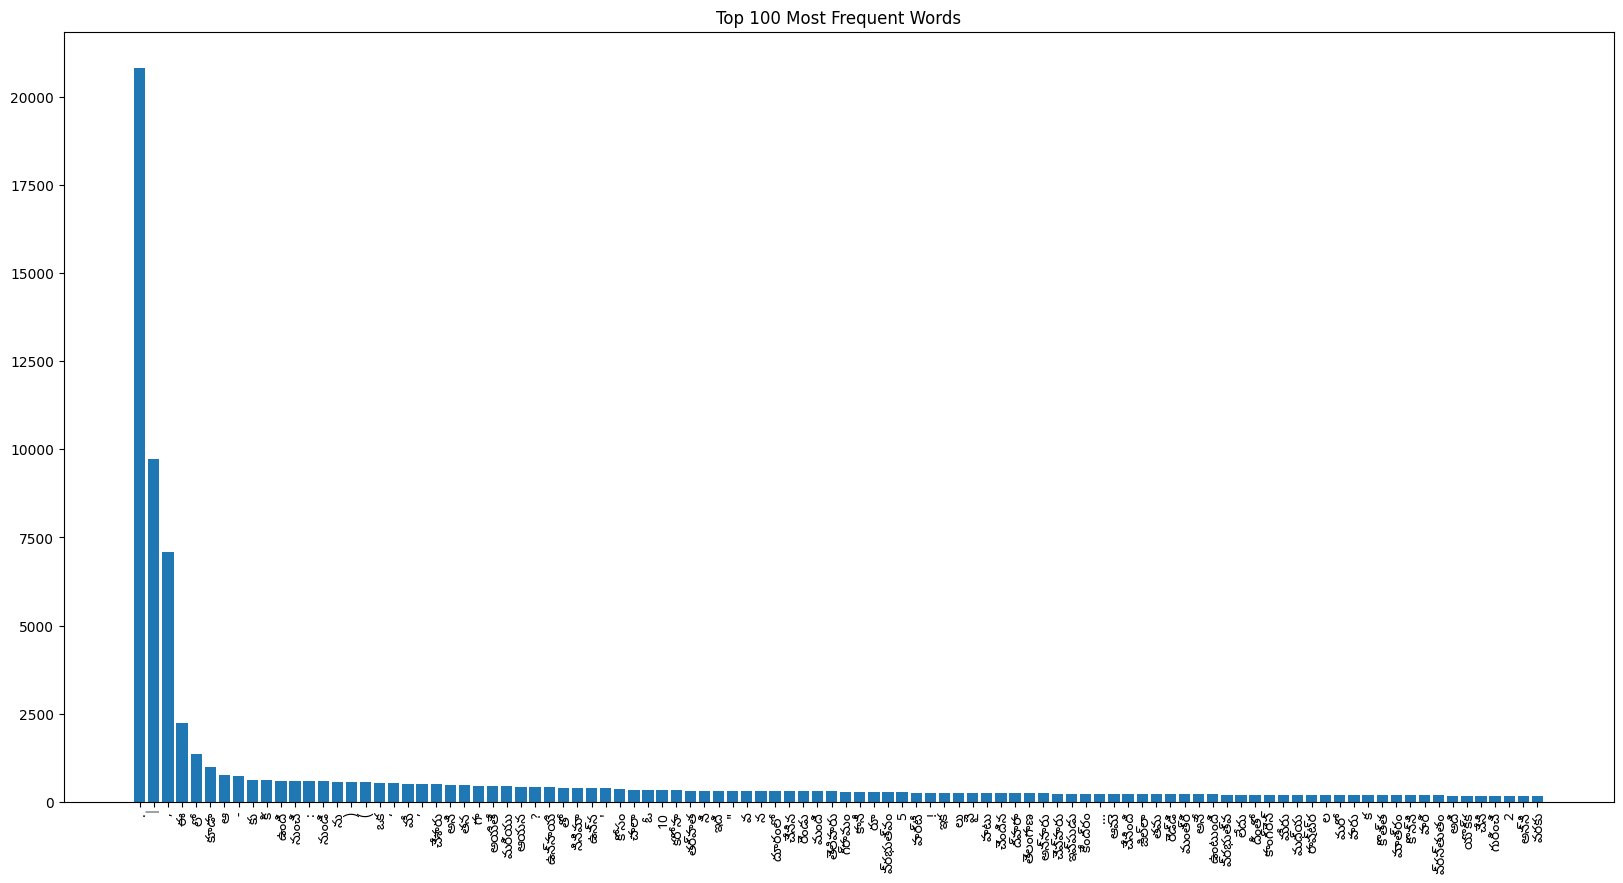

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rcParams
telugu_font_path = "/usr/share/fonts/truetype/noto/NotoSansTelugu-Regular.ttf"
telugu_font = fm.FontProperties(fname=telugu_font_path)
words = [w for w, f in top100]
freqs = [f for w, f in top100]
plt.figure(figsize=(20,10))
plt.bar(words, freqs)
plt.xticks(rotation=90,fontproperties=telugu_font)
plt.title("Top 100 Most Frequent Words")
plt.show()